In [53]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

dataPath = "data/paradigms/clean/"

with open(dataPath + "vocabulary.txt", "r") as f:
    vocabulary = f.readlines()

neutral_topic_mean = np.load("neutral_topic_mean.npy")
negative_topic_mean = np.load("negative_topic_mean.npy")
positive_topic_mean = np.load("positive_topic_mean.npy")
authors = pd.read_csv("authors.csv")
authors["name"]

decoder = pd.read_csv(dataPath +'id_name_para.csv', index_col=0)['Judge Name']


In [54]:
# @title Run this cell to create helper function for printing topics


def get_topics(
    neutral_mean, negative_mean, positive_mean, vocabulary, print_to_terminal=True
):
    num_topics, num_words = neutral_mean.shape
    words_per_topic = 10
    top_neutral_words = np.argsort(-neutral_mean, axis=1)
    top_negative_words = np.argsort(-negative_mean, axis=1)
    top_positive_words = np.argsort(-positive_mean, axis=1)
    topic_strings = []
    for topic_idx in range(num_topics):
        neutral_start_string = "Neutral  {}:".format(topic_idx)
        neutral_row = [
            vocabulary[word] for word in top_neutral_words[topic_idx, :words_per_topic]
        ]
        neutral_row_string = ", ".join(neutral_row)
        neutral_string = " ".join([neutral_start_string, neutral_row_string])

        positive_start_string = "Positive {}:".format(topic_idx)
        positive_row = [
            vocabulary[word] for word in top_positive_words[topic_idx, :words_per_topic]
        ]
        positive_row_string = ", ".join(positive_row)
        positive_string = " ".join([positive_start_string, positive_row_string])

        negative_start_string = "Negative {}:".format(topic_idx)
        negative_row = [
            vocabulary[word] for word in top_negative_words[topic_idx, :words_per_topic]
        ]
        negative_row_string = ", ".join(negative_row)
        negative_string = " ".join([negative_start_string, negative_row_string])

        if print_to_terminal:
            topic_strings.append(negative_string)
            topic_strings.append(neutral_string)
            topic_strings.append(positive_string)
            topic_strings.append("==========")
        else:
            topic_strings.append(
                "  \n".join([negative_string, neutral_string, positive_string])
            )

    if print_to_terminal:
        all_topics = "{}\n".format(np.array(topic_strings))
    else:
        all_topics = np.array(topic_strings)
    return all_topics

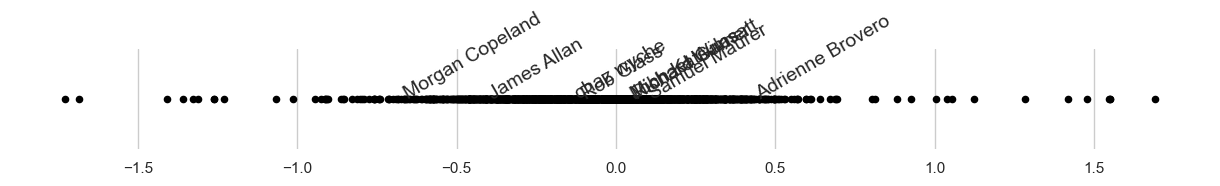

In [56]:
selected_authors = np.array(
    [
        "Rob Glass",
        "James Allan",
        "Michael Wimsatt",
        "Richard Garner",
        "Austin Koort",
        "Adrienne Brovero",
        "Nyx Moore",
        "Judd Kimball",
        "Ayoka Wicks",
        "Morgan Copeland",
        "John Katsulas",
        "Samuel Maurer"
    ]
)

sns.set(style="whitegrid")
fig = plt.figure(figsize=(12, 1))
ax = plt.axes([0, 0, 1, 1], frameon=False)
for index in range(authors.shape[0]):
    ax.scatter(authors["ideal_point"][index], 0, c="black", s=20)
    if decoder[authors["name"][index]] in selected_authors:
        ax.annotate(
            decoder[authors["name"][index]],
            xy=(authors["ideal_point"][index], 0.0),
            xytext=(authors["ideal_point"][index], 0),
            rotation=30,
            size=14,
        )
ax.set_yticks([])
plt.show()



In [57]:
authors.drop('Unnamed: 0', inplace=True, axis=1)
authors.sort_values('ideal_point', inplace=True)
authors.rename({'name':'Judge ID'}, axis=1, inplace=True)
authors.set_index('Judge ID', inplace=True)
authors = authors.merge(decoder, on='Judge ID')

In [1]:

authors.head(-20)

NameError: name 'authors' is not defined

In [66]:

topics = get_topics(neutral_topic_mean, positive_topic_mean, negative_topic_mean, vocabulary)
topics

"['Negative 0: particular aff\\n, activity\\n, transfer\\n, rounds where\\n, stuff t\\n, sub\\n, possibly\\n, argues\\n, views\\n, duty\\n'\n 'Neutral  0: activity\\n, debaters could\\n, combo\\n, sub\\n, line between\\n, particular aff\\n, dr\\n, issues\\n, roleplaying\\n, chooses\\n'\n 'Positive 0: debaters could\\n, speed\\n, part aff\\n, circuit\\n, risk\\n, persuasive against\\n, western\\n, ndt ceda\\n, tx\\n, made ac\\n'\n '=========='\n 'Negative 1: has impact\\n, our activity\\n, high school tournaments\\n, use state\\n, throughout\\n, politics das\\n, bit\\n, usually pretty\\n, military presence\\n, ground aff\\n'\n 'Neutral  1: our activity\\n, now coach\\n, its good\\n, use state\\n, world view\\n, lightly\\n, ground aff\\n, work theory\\n, tangible\\n, love creative\\n'\n 'Positive 1: look evidence\\n, now coach\\n, then coached\\n, actually\\n, dot\\n, voting against\\n, love creative\\n, might even\\n, has always been\\n, once again\\n'\n '=========='\n 'Negative 2: perf